**Домашняя работа №1**

**Задание** - *уровень 0*

Даны вектора x=(1,1), y=(2, 0) и z = (0,2)
Надо:
- Изобразить вектора на экране
- Изобразить точку x + y + z
- Найти угол между векторами x и y

In [59]:
import numpy as np
import pylab as pl
import pandas as pd

from matplotlib import pyplot as plt

In [45]:
x = np.array([1,1])
y = np.array([2,0])
z = np.array([0,2])

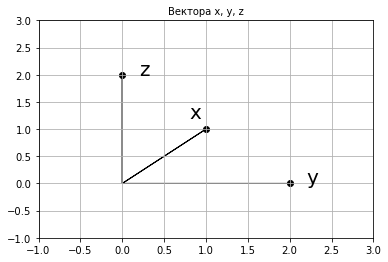

In [46]:
ax = plt.axes()

ax.arrow(0, 0, x[0], x[1])
ax.arrow(0, 0, y[0], y[1])
ax.arrow(0, 0, z[0], z[1])

plt.scatter(x[0],x[1],color='black')
plt.scatter(y[0],y[1],color='black')
plt.scatter(z[0],z[1],color='black')

ax.annotate('x', (x[0]-0.2,x[1]+0.2),fontsize=20)
ax.annotate('y', (y[0]+0.2,y[1]),fontsize=20)
ax.annotate('z', (z[0]+0.2,z[1]),fontsize=20)

plt.grid()

plt.xlim(-1,3)
plt.ylim(-1,3)

plt.title('Вектора x, y, z',fontsize=10)

plt.show()

In [47]:
t = x + y + z
f = f't({t[0]},{t[1]})'
print(t)
print(f)

[3 3]
t(3,3)


<ipython-input-49-08eae30feebb>:3: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate((f), (t[0], t[1]), fontsize=12, ha='right', textcoords='offset points')


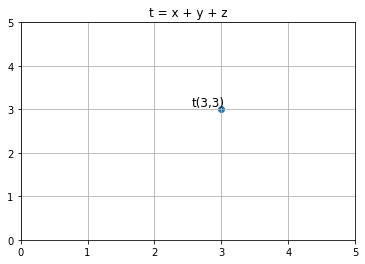

In [49]:
plt.scatter(t[0], t[1])

plt.annotate((f), (t[0], t[1]), fontsize=12, ha='right', textcoords='offset points')

plt.grid()

plt.xlim(0,5)
plt.ylim(0,5)

plt.title('t = x + y + z', fontsize=12)

plt.show()

Угол между векторами x и y:

In [61]:
x_Length = np.linalg.norm( x )
y_Length = np.linalg.norm( y )

cos_ = np.dot( x, y ) / ( x_Length * y_Length )
ang = int(np.arccos( cos_ ) * 360 / 2 / np.pi)

print(f'Угол между векторами x и y составляет {ang} градусов')

Угол между векторами x и y составляет 45 градусов


**Задание** - *уровень 1*

Выбрать любые n домов, образующих базис в пространстве признаков дома (все колонки, кроме medv)
Написать код разложения дома по указанному базису

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('boston_data.csv')
data.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [36]:
# Выберем базис
basis = data.iloc[:len(data.columns)-1,:len(data.columns)-1]
basis

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43
5,0.08370,45.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,398.0,15.2,396.90,5.39
6,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56
7,0.26938,0.0,9.90,0.0,0.544,6.266,82.8,3.2628,4.0,304.0,18.4,393.39,7.90
8,10.06230,0.0,18.10,0.0,0.584,6.833,94.3,2.0882,24.0,666.0,20.2,81.33,19.69
9,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12


In [37]:
basis = np.array(basis)
basis

array([[1.58760e-01, 0.00000e+00, 1.08100e+01, 0.00000e+00, 4.13000e-01,
        5.96100e+00, 1.75000e+01, 5.28730e+00, 4.00000e+00, 3.05000e+02,
        1.92000e+01, 3.76940e+02, 9.88000e+00],
       [1.03280e-01, 2.50000e+01, 5.13000e+00, 0.00000e+00, 4.53000e-01,
        5.92700e+00, 4.72000e+01, 6.93200e+00, 8.00000e+00, 2.84000e+02,
        1.97000e+01, 3.96900e+02, 9.22000e+00],
       [3.49400e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.44000e-01,
        5.97200e+00, 7.67000e+01, 3.10250e+00, 4.00000e+00, 3.04000e+02,
        1.84000e+01, 3.96240e+02, 9.97000e+00],
       [2.73397e+00, 0.00000e+00, 1.95800e+01, 0.00000e+00, 8.71000e-01,
        5.59700e+00, 9.49000e+01, 1.52570e+00, 5.00000e+00, 4.03000e+02,
        1.47000e+01, 3.51850e+02, 2.14500e+01],
       [4.33700e-02, 2.10000e+01, 5.64000e+00, 0.00000e+00, 4.39000e-01,
        6.11500e+00, 6.30000e+01, 6.81470e+00, 4.00000e+00, 2.43000e+02,
        1.68000e+01, 3.93970e+02, 9.43000e+00],
       [8.37000e-02, 4.50000e+

In [43]:
# Найдём определитель базиса
np.linalg.det(basis)

-478254911772.19904

In [27]:
len(data.columns)

14

In [40]:
y = np.full(len(data.columns)-1, 1)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [42]:
x = np.linalg.solve(basis, y)
x

array([ 1.11984873e-03,  2.17725956e-04,  1.73558772e-02,  8.39643025e-02,
       -7.04341449e-01,  6.36204889e-02,  1.05441978e-03, -1.06313551e-03,
        1.63478798e-02, -5.34146740e-05, -6.94935702e-03,  1.86223573e-03,
        9.45361433e-03])